In [1]:
import osmnx as ox
import networkx as nx
import folium

In [3]:
## Define the bounding box coordinates
place = 'Piedmont, CA, USA'
G = ox.graph_from_place(place, network_type='drive')


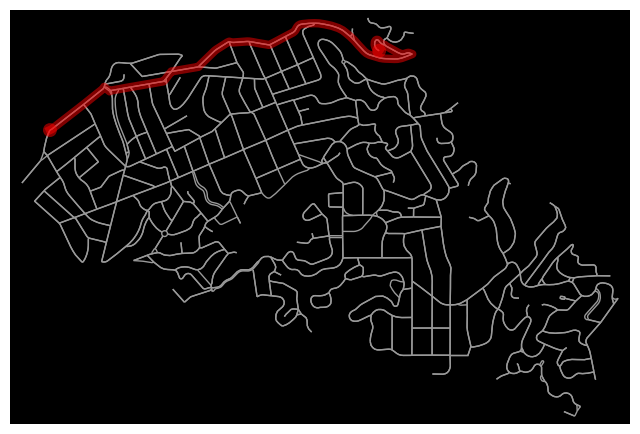

In [4]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[0]
dest = list(G)[-1]
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [5]:
# Define the bounding box coordinates
place = 'Distrito Federal, Brasilia, Brazil'
G = ox.graph_from_place(place, network_type='drive')

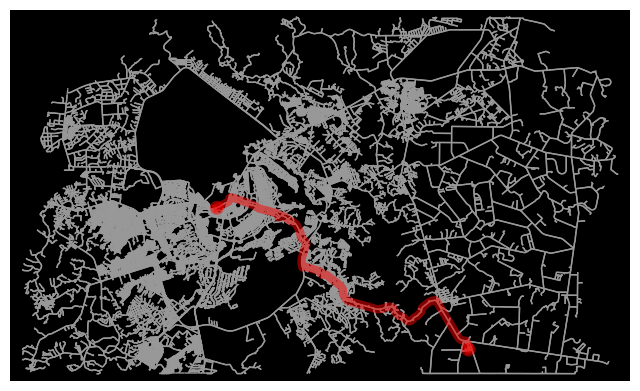

In [6]:
## find the shortest path (by distance) between these nodes then plot it
orig = list(G)[0]
dest = list(G)[-1]
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [4]:
# Define the bounding box coordinates
place = 'Distrito Federal, Brasilia, Brazil'
graph = ox.graph_from_place(place, network_type='drive')

In [5]:
# Save the Graph in file_path
file_path = "brasilia.graphml"
ox.save_graphml(graph, filepath=file_path)

In [6]:
# Load Graph 
graph2 = ox.load_graphml(filepath=file_path)

# Define the origin and destination points
orig = (-15.989444964529529, -48.044418962814866) # Unb Gama
dest = (-15.79113644987054, -47.88317800514907)   # Conjunto Nacional

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(graph2, orig[1], orig[0])
dest_node = ox.nearest_nodes(graph2, dest[1], dest[0])




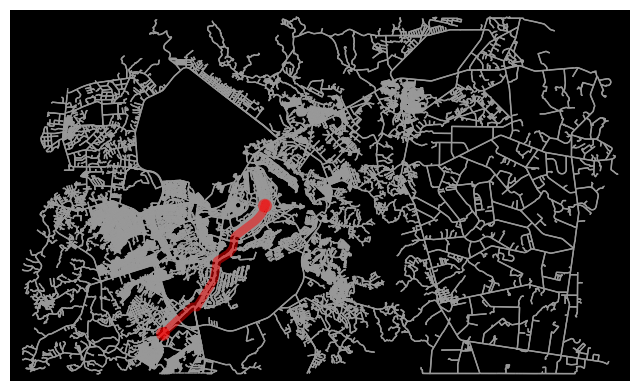

In [7]:
# Calculate the shortest path using Dijkstra's algorithm
shortest_path = nx.shortest_path(graph2, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(graph2, shortest_path, route_linewidth=6, node_size=0, bgcolor='k')

In [4]:
# Define a área do Grafo e gera Grafo com ruas públicas dirigíveis, incluindo estradas de serviço
place = 'Distrito Federal, Brasilia, Brazil'
graph = ox.graph_from_place(place, network_type='drive_service')

In [8]:
%%time
orig = (-15.989444964529529, -48.044418962814866) # Unb Gama
dest = (-15.79113644987054, -47.88317800514907)   # Conjunto Nacional

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(graph, orig[1], orig[0])
dest_node = ox.nearest_nodes(graph, dest[1], dest[0])

shortest_path = nx.shortest_path(graph, orig_node, dest_node, weight='length')


CPU times: user 2.71 s, sys: 3.83 ms, total: 2.72 s
Wall time: 2.71 s


In [10]:
# Create a folium map centered on the origin point
m = folium.Map(location=orig, zoom_start=12)

# Plot the origin and destination points on the map
folium.Marker(location=orig, popup="Origin").add_to(m)
folium.Marker(location=dest, popup="Destination").add_to(m)

# Plot the shortest path on the map
route_coordinates = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in shortest_path]
folium.PolyLine(locations=route_coordinates, color='blue').add_to(m)

m

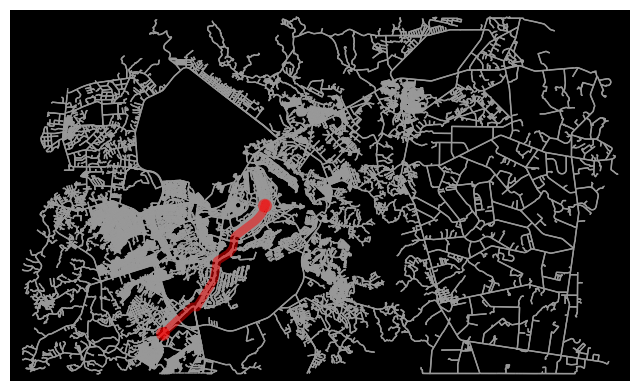

In [9]:
# Calculate the shortest path using Dijkstra's algorithm
shortest_path = nx.shortest_path(graph, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(graph, shortest_path, route_linewidth=6, node_size=0, bgcolor='k')